<pre>
Name: Ritika Sarkar 
Reg. No.: 19BAI1031 
Faculty: Dr. G. Suganya 
Slot: L3 + L4 
Course Code: CSE1015 
Date: 10.05.2021
</pre>

## K-Mode Clustering (Unsupervised Learning)

Link to classification dataset : https://archive.ics.uci.edu/ml/datasets/Cervical+Cancer+Behavior+Risk#

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('sobar-72.csv')

In [3]:
df.head()

behavior_eating  behavior_personalHygine  intention_aggregation  \
0               13                       12                      4   
1               11                       11                     10   
2               15                        3                      2   
3               11                       10                     10   
4               11                        7                      8   

   intention_commitment  attitude_consistency  attitude_spontaneity  \
0                     7                     9                    10   
1                    14                     7                     7   
2                    14                     8                    10   
3                    15                     7                     7   
4                    10                     7                     8   

   norm_significantPerson  norm_fulfillment  perception_vulnerability  \
0                       1                 8                         7   
1                       5                 5                         4   
2                       1                 4                         7   
3                       1                 5                         4   
4                       1                 5                         3   

   perception_severity  motivation_strength  motivation_willingness  \
0                    3                   14                       8   
1                    2                   15                      13   
2                    2                    7                       3   
3                    2                   15                      13   
4                    2                   15                       5   

   socialSupport_emotionality  socialSupport_appreciation  \
0                           5                           7   
1                           7                           6   
2                           3                           6   
3                           7                           4   
4                           3                           6   

   socialSupport_instrumental  empowerment_knowledge  empowerment_abilities  \
0                          12                     12                     11   
1                           5                      5                      4   
2                          11                      3                      3   
3                           4                      4                      4   
4                          12                      5                      4   

   empowerment_desires  ca_cervix  
0                    8          1  
1                    4          1  
2                   15          1  
3                    4          1  
4                    7          1

### Data description
<pre>
1) behavior_eating
2) behavior_personalHygine
3) intention_aggregation
4) intention_commitment
5) attitude_consistency
6) attitude_spontaneity
7) norm_significantPerson
8) norm_fulfillment
9) perception_vulnerability
10) perception_severity
11) motivation_strength
12) motivation_willingness
13) socialSupport_emotionality
14) socialSupport_appreciation
15) socialSupport_instrumental
16) empowerment_knowledge
17) empowerment_abilities
18) empowerment_desires
19) ca_cervix (this is class attribute, 1=has cervical cancer, 0=no cervical cancer)
</pre>

In [4]:
# we'll drop column 19 as its a class label

Exploratory data analysis

In [5]:
df.describe()

behavior_eating  behavior_personalHygine  intention_aggregation  \
count        72.000000                72.000000              72.000000   
mean         12.791667                11.083333               7.902778   
std           2.361293                 3.033847               2.738148   
min           3.000000                 3.000000               2.000000   
25%          11.000000                 9.000000               6.000000   
50%          13.000000                11.000000              10.000000   
75%          15.000000                14.000000              10.000000   
max          15.000000                15.000000              10.000000   

       intention_commitment  attitude_consistency  attitude_spontaneity  \
count             72.000000             72.000000             72.000000   
mean              13.347222              7.180556              8.611111   
std                2.374511              1.522844              1.515698   
min                6.000000              2.000000              4.000000   
25%               11.000000              6.000000              8.000000   
50%               15.000000              7.000000              9.000000   
75%               15.000000              8.000000             10.000000   
max               15.000000             10.000000             10.000000   

       norm_significantPerson  norm_fulfillment  perception_vulnerability  \
count               72.000000         72.000000                 72.000000   
mean                 3.125000          8.486111                  8.513889   
std                  1.845722          4.907577                  4.275686   
min                  1.000000          3.000000                  3.000000   
25%                  1.000000          3.000000                  5.000000   
50%                  3.000000          7.000000                  8.000000   
75%                  5.000000         14.000000                 13.000000   
max                  5.000000         15.000000                 15.000000   

       perception_severity  motivation_strength  motivation_willingness  \
count            72.000000            72.000000               72.000000   
mean              5.388889            12.652778                9.694444   
std               3.400727             3.207209                4.130406   
min               2.000000             3.000000                3.000000   
25%               2.000000            11.000000                7.000000   
50%               4.000000            14.000000               11.000000   
75%               9.000000            15.000000               13.000000   
max              10.000000            15.000000               15.000000   

       socialSupport_emotionality  socialSupport_appreciation  \
count                   72.000000                   72.000000   
mean                     8.097222                    6.166667   
std                      4.243171                    2.897303   
min                      3.000000                    2.000000   
25%                      3.000000                    3.750000   
50%                      9.000000                    6.500000   
75%                     11.250000                    9.000000   
max                     15.000000                   10.000000   

       socialSupport_instrumental  empowerment_knowledge  \
count                   72.000000              72.000000   
mean                    10.375000              10.541667   
std                      4.316485               4.366768   
min                      3.000000               3.000000   
25%                      6.750000               7.000000   
50%                     12.000000              12.000000   
75%                     14.250000              15.000000   
max                     15.000000              15.000000   

       empowerment_abilities  empowerment_desires  ca_cervix  
count              72.000000            72.000000  72.000000  
mean                9.319444            1

In [6]:
df.shape

(72, 19)

In [7]:
df.columns

Index(['behavior_eating', 'behavior_personalHygine', 'intention_aggregation',
       'intention_commitment', 'attitude_consistency', 'attitude_spontaneity',
       'norm_significantPerson', 'norm_fulfillment',
       'perception_vulnerability', 'perception_severity',
       'motivation_strength', 'motivation_willingness',
       'socialSupport_emotionality', 'socialSupport_appreciation',
       'socialSupport_instrumental', 'empowerment_knowledge',
       'empowerment_abilities', 'empowerment_desires', 'ca_cervix'],
      dtype='object')

In [8]:
df.isnull().sum() # checking missing values

behavior_eating               0
behavior_personalHygine       0
intention_aggregation         0
intention_commitment          0
attitude_consistency          0
attitude_spontaneity          0
norm_significantPerson        0
norm_fulfillment              0
perception_vulnerability      0
perception_severity           0
motivation_strength           0
motivation_willingness        0
socialSupport_emotionality    0
socialSupport_appreciation    0
socialSupport_instrumental    0
empowerment_knowledge         0
empowerment_abilities         0
empowerment_desires           0
ca_cervix                     0
dtype: int64

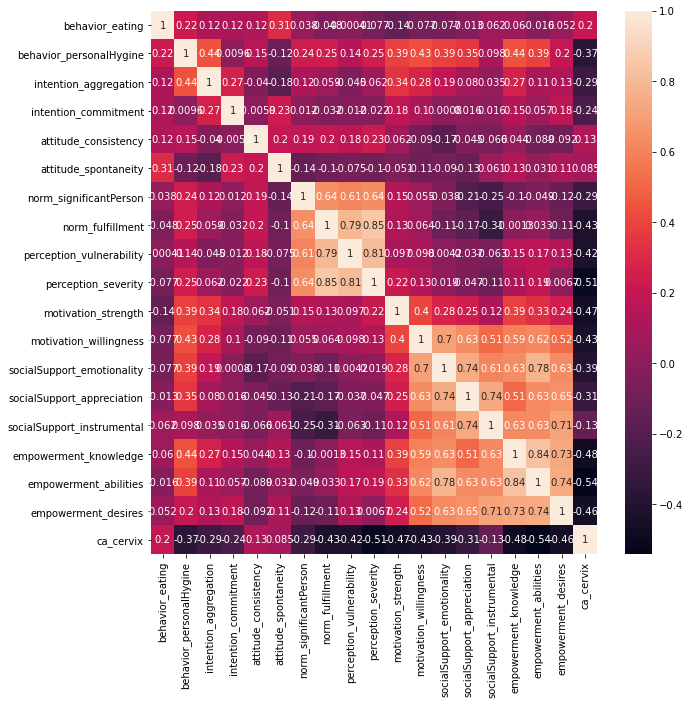

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True) # checking correlation

Here we observe that quite a lot of features have high correlation amongst themselves

## Data cleaning for modelling

In [9]:
new_df = df.copy()

In [10]:
df.drop('ca_cervix',axis=1, inplace=True) # DON'T RUN THIS CELL TWICE

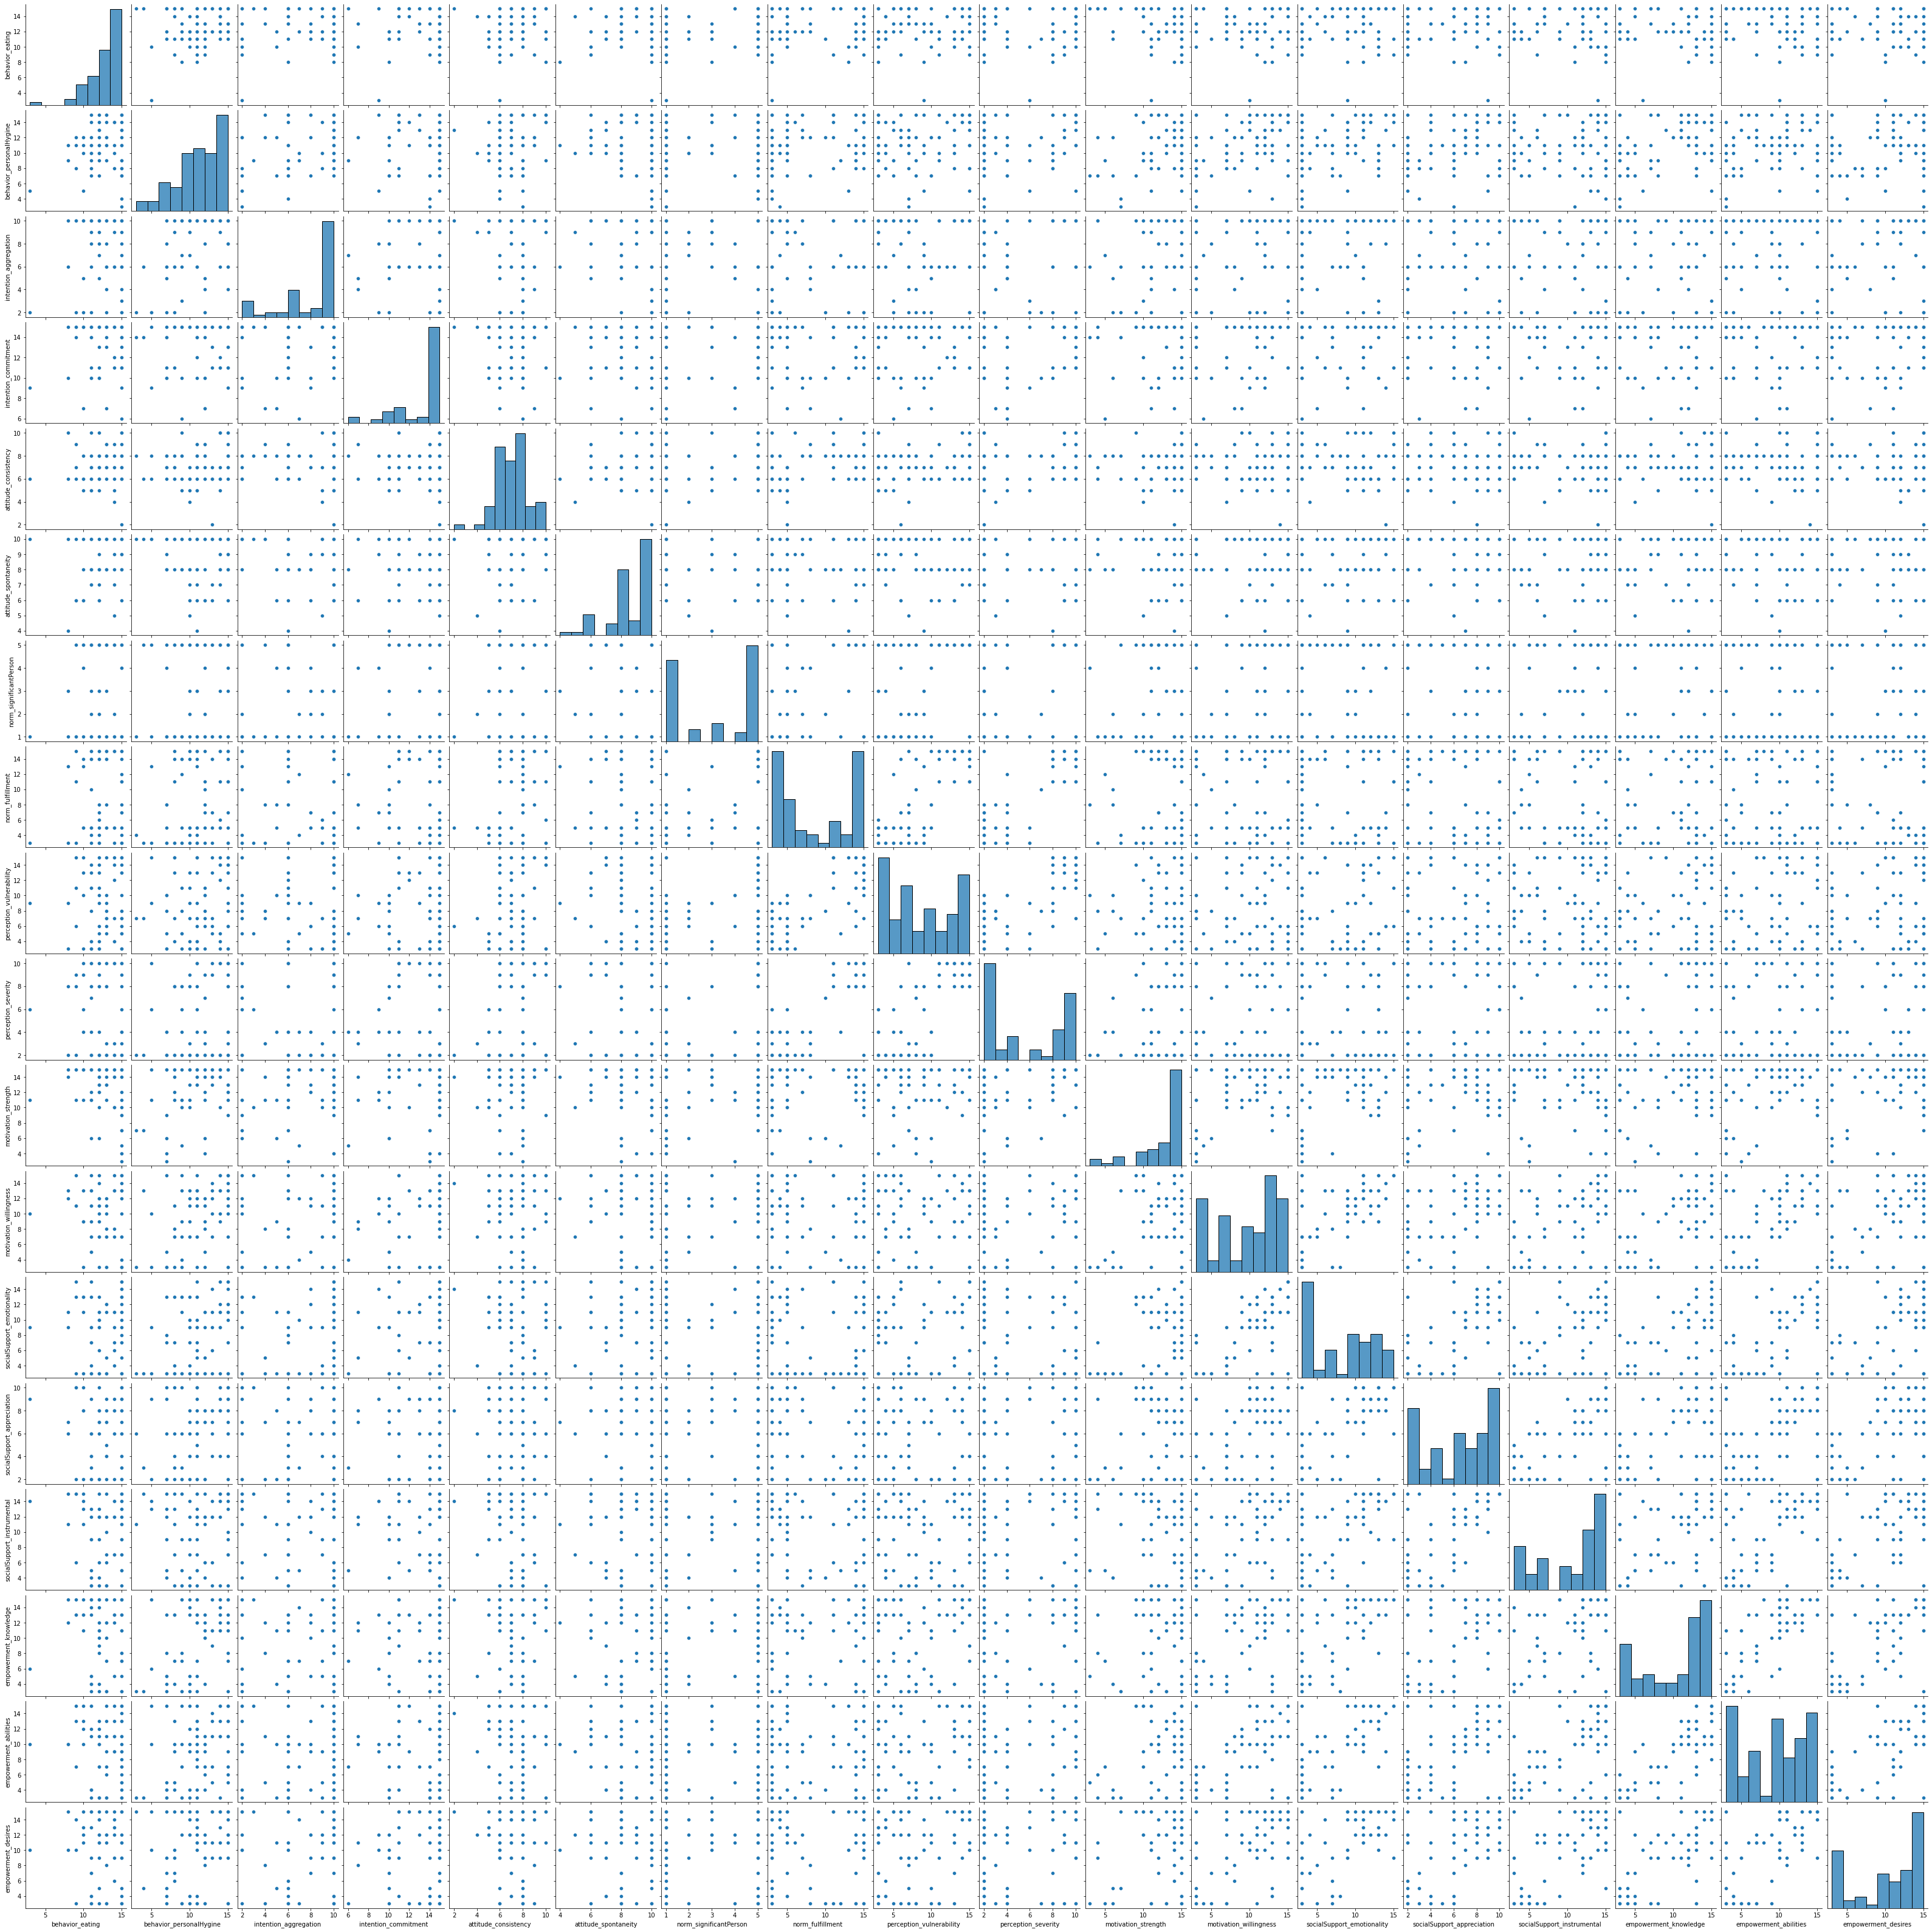

In [11]:
# to check the relations among the different columns
sns.pairplot(df)

In [12]:
df.head(3)

behavior_eating  behavior_personalHygine  intention_aggregation  \
0               13                       12                      4   
1               11                       11                     10   
2               15                        3                      2   

   intention_commitment  attitude_consistency  attitude_spontaneity  \
0                     7                     9                    10   
1                    14                     7                     7   
2                    14                     8                    10   

   norm_significantPerson  norm_fulfillment  perception_vulnerability  \
0                       1                 8                         7   
1                       5                 5                         4   
2                       1                 4                         7   

   perception_severity  motivation_strength  motivation_willingness  \
0                    3                   14                       8   
1                    2                   15                      13   
2                    2                    7                       3   

   socialSupport_emotionality  socialSupport_appreciation  \
0                           5                           7   
1                           7                           6   
2                           3                           6   

   socialSupport_instrumental  empowerment_knowledge  empowerment_abilities  \
0                          12                     12                     11   
1                           5                      5                      4   
2                          11                      3                      3   

   empowerment_desires  
0                    8  
1                    4  
2                   15

## Choosing k - Elbow method

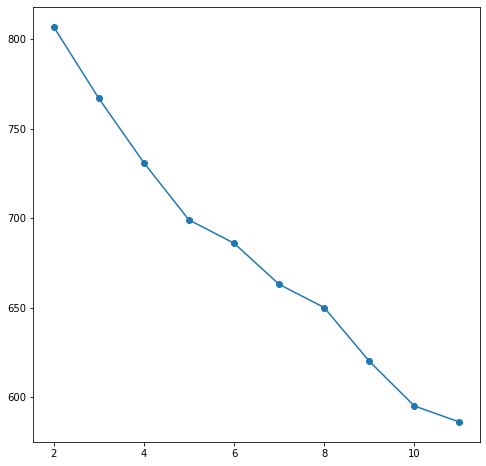

In [13]:
from kmodes.kmodes import KModes

metric = []
cluster = []
for k in range(2,12):
    km = KModes(n_clusters=k)
    km.fit(df)
    cluster.append(k)
    metric.append(km.cost_) # Clustering cost, defined as the sum distance of all points to their respective cluster centroids.

plt.figure(figsize=(8,8))
plt.plot(cluster,metric,marker='o')
plt.show()

Here we observe that the graph bends around k = 5 (inflexion point)
- So we choose k = 5

## Modelling

In [14]:
from kmodes.kmodes import KModes
km = KModes(n_clusters=5)
pred = km.fit_predict(df)

In [15]:
pred

array([2, 0, 0, 0, 0, 4, 0, 1, 0, 4, 0, 4, 0, 0, 4, 4, 1, 1, 1, 2, 4, 0,
       0, 0, 0, 0, 3, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0,
       2, 3, 2, 3, 0, 1, 3, 0, 1, 2, 3, 0, 4, 1, 1, 1, 1, 3, 1, 1, 4, 4,
       1, 2, 1, 2, 3, 2], dtype=uint16)

In [16]:
km.cluster_centroids_

array([[15, 11, 10, 15,  6, 10,  1,  3,  3,  2, 15, 13,  3, 10, 15, 15,
        15, 15],
       [12,  9, 10, 15,  8,  8,  5, 14, 11,  8, 13,  7,  3,  2,  3,  3,
         3,  3],
       [14, 12, 10, 15,  9, 10,  5, 15, 14, 10, 15, 13,  9,  7, 12, 12,
        11,  9],
       [15, 15, 10, 11,  6,  6,  5,  5, 13, 10, 15, 15, 11,  8, 15, 15,
        13, 15],
       [15,  8,  6, 15,  8, 10,  5,  3, 15,  2, 15,  3,  3,  2,  7,  7,
         5,  3]], dtype=int64)

In [17]:
km.cost_

699.0

In [18]:
km.labels_

array([2, 0, 0, 0, 0, 4, 0, 1, 0, 4, 0, 4, 0, 0, 4, 4, 1, 1, 1, 2, 4, 0,
       0, 0, 0, 0, 3, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0,
       2, 3, 2, 3, 0, 1, 3, 0, 1, 2, 3, 0, 4, 1, 1, 1, 1, 3, 1, 1, 4, 4,
       1, 2, 1, 2, 3, 2], dtype=uint16)

## Metrics

Drawback of using cost as a metric is that, lower cost is observed for higher values of k. So if we increase k then we'll get more clusters which may lead to excessive unnecessary partitioning of the data. And for lower k, it obviously gives more cost which means the model may not be able to map all the clusters. So to find the optimal value of k in a more precise way, we use the silhouette_score
- silhouette_score is the mean silhouette coefficient over all the instances. 

In [19]:
# using silhoutte score
from sklearn.metrics import silhouette_score
silhouette_score(df,km.labels_)

0.004010370039274055

The Silhouette score is quite low, so we'll plot a graph to see if there exists another k which has a better score

In [20]:
cluster

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

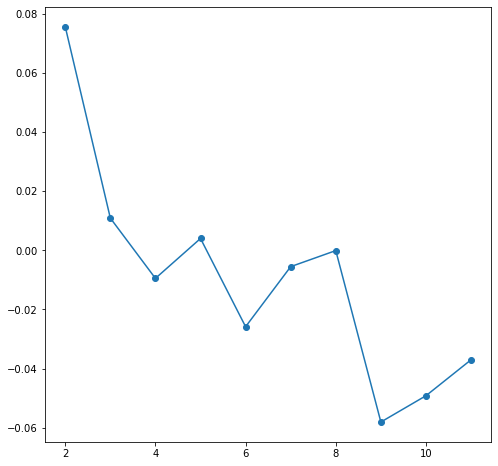

In [21]:
# choosing k using silhouette scores
sscore = []
for k in cluster:
    km1 = KModes(n_clusters=k)
    km1.fit(df)
    sscore.append(silhouette_score(df,km1.labels_))

plt.figure(figsize=(8,8))
plt.plot(cluster,sscore,marker='o')
plt.show()

We observe that k = 2 would have given a better model, because the silhouette score is higher. If its closer to 0, that means the cluster points are closer to a cluster boundary and don't have good affinity towards the cluster

## Remodelling

In [22]:
# choosing k = 2
km1 = KModes(n_clusters=2)
km1.fit_predict(df)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0], dtype=uint16)

In [23]:
km1.cost_ # it has a higher cost than the previous model

807.0

In [24]:
df.head(2)

behavior_eating  behavior_personalHygine  intention_aggregation  \
0               13                       12                      4   
1               11                       11                     10   

   intention_commitment  attitude_consistency  attitude_spontaneity  \
0                     7                     9                    10   
1                    14                     7                     7   

   norm_significantPerson  norm_fulfillment  perception_vulnerability  \
0                       1                 8                         7   
1                       5                 5                         4   

   perception_severity  motivation_strength  motivation_willingness  \
0                    3                   14                       8   
1                    2                   15                      13   

   socialSupport_emotionality  socialSupport_appreciation  \
0                           5                           7   
1                           7                           6   

   socialSupport_instrumental  empowerment_knowledge  empowerment_abilities  \
0                          12                     12                     11   
1                           5                      5                      4   

   empowerment_desires  
0                    8  
1                    4

In [25]:
pred = km1.labels_

In [26]:
# add new column
df['Cluster'] = pred
df.head()

behavior_eating  behavior_personalHygine  intention_aggregation  \
0               13                       12                      4   
1               11                       11                     10   
2               15                        3                      2   
3               11                       10                     10   
4               11                        7                      8   

   intention_commitment  attitude_consistency  attitude_spontaneity  \
0                     7                     9                    10   
1                    14                     7                     7   
2                    14                     8                    10   
3                    15                     7                     7   
4                    10                     7                     8   

   norm_significantPerson  norm_fulfillment  perception_vulnerability  \
0                       1                 8                         7   
1                       5                 5                         4   
2                       1                 4                         7   
3                       1                 5                         4   
4                       1                 5                         3   

   perception_severity  motivation_strength  motivation_willingness  \
0                    3                   14                       8   
1                    2                   15                      13   
2                    2                    7                       3   
3                    2                   15                      13   
4                    2                   15                       5   

   socialSupport_emotionality  socialSupport_appreciation  \
0                           5                           7   
1                           7                           6   
2                           3                           6   
3                           7                           4   
4                           3                           6   

   socialSupport_instrumental  empowerment_knowledge  empowerment_abilities  \
0                          12                     12                     11   
1                           5                      5                      4   
2                          11                      3                      3   
3                           4                      4                      4   
4                          12                      5                      4   

   empowerment_desires  Cluster  
0                    8        0  
1                    4        0  
2                   15        0  
3                    4        0  
4                    7        0

In [27]:
df['Cluster'].nunique() #clustering result

2

## Visualising the clusters

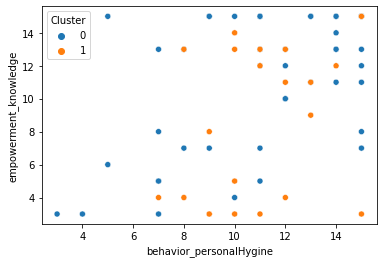

In [38]:
sns.scatterplot(x= df['behavior_personalHygine'],y=df['empowerment_knowledge'],hue='Cluster', data = df)
plt.show()

It is expected that most of the people who were empowered with knowledge and had high personal hygiene have low chance of getting cervical cancer. There are very rare cases where despite having both, the person has a chance of getting cancer.

In [29]:
df['Cluster'].value_counts()

0    51
1    21
Name: Cluster, dtype: int64